In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [21]:
image_directory = '/home/ethan/Documents/circlesnake-yilin/tiles/P18_1908_S2/'
annotation_file = '/home/ethan/Documents/circlesnake-yilin/coco/Eos_train2022.json'

In [22]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [23]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
eos papilla rbc cluster

Custom COCO supercategories: 
Class


In [24]:
category_ids = example_coco.getCatIds(catNms=1)
print(category_ids)
image_ids = example_coco.getImgIds(catIds=category_ids)
print(image_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

[]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]


In [25]:
image_data

{'id': 127,
 'file_name': 'P18_1908_S2 [x=27776,y=25088,w=512,h=512].jpg',
 'width': 512,
 'height': 512,
 'date_captured': '2022-09-06 05:17:36.585425',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

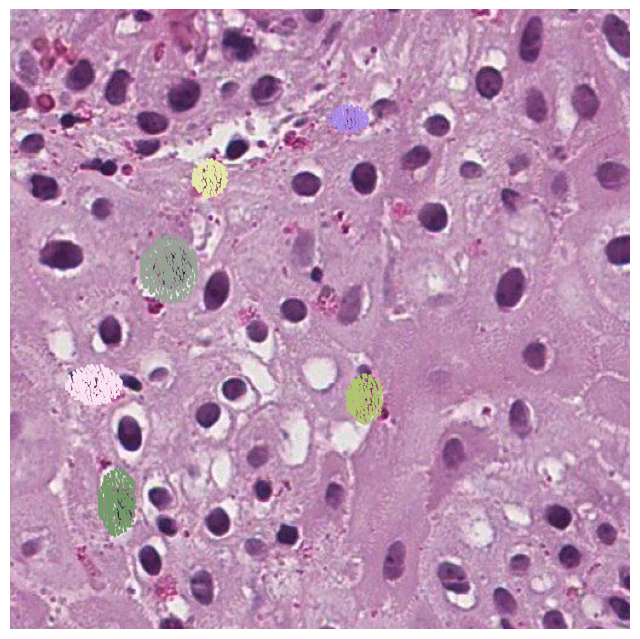

In [26]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
imgid = image_data['id']
# print(imgid)
# print(annotations)
example_coco.showAnns(annotations)